In [1]:
import pandas as pd

In [2]:
tfidf = pd.read_excel("TF-IDF_normalisasi_01.xlsx")

In [3]:
target = pd.read_excel('analisis hapus.xlsx')

In [4]:
tfidf['target_outlier'] = target.target_outlier
tfidf_df_clean_01 = tfidf[tfidf.target_outlier != -1]
tfidf_df_clean_01 = tfidf_df_clean_01.drop(columns=['target_outlier'])

In [5]:
print(tfidf_df_clean_01)

      aam  aamiin  abad  abadi  abah  abai  abang  abd  abdan  abdi  ...  \
0     0.0     0.0   0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  ...   
1     0.0     0.0   0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  ...   
2     0.0     0.0   0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  ...   
4     0.0     0.0   0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  ...   
6     0.0     0.0   0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  ...   
...   ...     ...   ...    ...   ...   ...    ...  ...    ...   ...  ...   
1558  0.0     0.0   0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  ...   
1559  0.0     0.0   0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  ...   
1561  0.0     0.0   0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  ...   
1562  0.0     0.0   0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  ...   
1563  0.0     0.0   0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  ...   

      zhongxiiao  zhongzheng  ziarah  zikir  zina  zona  zubair  zuhri  zuhur  \
0     

In [6]:
index_centroid = pd.read_excel("index_inisiate_centroid.xlsx")

In [7]:
###############################################
# Import required libraries:
############################################### 
import numpy as np

###############################################
# Cosine Similarity Algorithm:
############################################### 
def cosine_sim(vecA, vecB):
    #create normalized copies of each vector:
    vecA_norm = np.linalg.norm(vecA)
    vecB_norm = np.linalg.norm(vecB)
    #compute cosine similarity:
    sim = np.dot(vecA, vecB)/(vecA_norm * vecB_norm) #this should return a scalar float
    return sim

###############################################
# Vectorized K Means Algorithm:
############################################### 

def K_Means(dataSet, k, max_iter=300, distMeas=cosine_sim):
    # Where dataSet is a Numpy array, k is the desired number of clusters, max_iter is the maximum number of loops (to avoid large or
    # infinite iterations), distMeas is the desired similarity measure (cosine similarity or Euclidean distance), and createCent is
    # the function which creates the initial randomized cluster centers.
    
    # Store the number of documents
    docs = np.shape(dataSet)[0]
    
    # Create an array of zeros to store 1) the cluster assignment and 2) the distance measure
    cluster = np.zeros((docs,2))
    
    # Call the randCent function to create a randomized set of k centroids
    Centroids = tfidf_df_clean_01.loc[index_centroid.loc[0:k-1][0]].to_numpy()
    
    # Initial values to start the while loop
    clusterChanged = True
    cur_iter = 0
    
    # While the cluster assignments are still changing and we have not reached the max iteration:
    while clusterChanged and cur_iter < max_iter:
        # Update the clusterChanged value so we don't run into an infinite loop.
        clusterChanged = False # note that there is code further down to change this to true if the clusters did change
        
        #assign the previous cluster to an object:
        previous_cluster = np.array(cluster, copy=True) #intially, this will be the random cluster starting points
        
        # Create an intital matrix of zeros to store similarity values:
        similarity = np.zeros((k,docs)) #this will eventually show you how similar each doc is to each cluster's centroid
        for j in range(k): #iterate once for each cluster (row)
            # Run cosine similarity as a numpy function along axis 1 (updates each doc's similarity value, one cluster at a time):
            similarity[j,:] = np.apply_along_axis(distMeas, 1, dataSet, Centroids[j,:])
            # Documentation: 
            # Execute func1d(a, *args) where func1d operates on 1-D arrays and 'a' is a 1-D slice of 'arr' along axis.       
            # Apply a function to 1-D slices along the given axis.
       
        # Capture both the cluster assigment and the similarity value. Note: max values => most similar. 
        cluster[:,0] = np.argmax(similarity, axis=0)         
        cluster[:,1] = np.amax(similarity, axis=0) 
        
        # If the clusters have not changed, break out of while loop
        if np.array_equal(cluster, previous_cluster):
            break 
        else:
            clusterChanged = True #sets this back to true if the cluster assinments are still changing
            # We only bother to recalculate centroid if there was a cluster reassignment
            for centroid in range(k): #iterate once for each cluster
                # Find the indicies of the documents that make up each cluster
                correct_cluster = np.where(cluster[:,0] == centroid)[0] 
                # Use the indicies to grab and store those documents separately
                docs_in_cluster = np.take(dataSet, correct_cluster, axis=0) 
                # If more than one document, take the mean as the new centroid (otherwise centroid is that one document)
                if len(docs_in_cluster) > 0: # TEST THIS CODE to see if the if statement can be removed
                    Centroids[centroid,:] = np.mean(docs_in_cluster, axis=0)
        cur_iter += 1
    return Centroids, cluster

In [9]:
from sklearn.metrics import silhouette_samples, silhouette_score


silhouette_0 = []
sse_0 = []
for n_clusters in range(2,21):
    centroid,cluster = K_Means(tfidf_df_clean_01.to_numpy(),n_clusters)

    cluster_labels = cluster[:,0]
    silhouette_avg = silhouette_score(tfidf_df_clean_01, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    
    sse = len(tfidf_df_clean_01.to_numpy())-np.sum(cluster[:,1])
    print("SSE", sse)
    silhouette_0.append(silhouette_avg)
    sse_0.append(sse)

For n_clusters = 2 The average silhouette_score is : 0.006184115811170017
SSE 1231.8360224524297
For n_clusters = 3 The average silhouette_score is : 0.006076601820593741
SSE 1213.0276186775664
For n_clusters = 4 The average silhouette_score is : 0.0074040207306161
SSE 1193.832262752033
For n_clusters = 5 The average silhouette_score is : 0.007756251196013404
SSE 1183.7031902296987
For n_clusters = 6 The average silhouette_score is : 0.00822309282915333
SSE 1171.1994607389536
For n_clusters = 7 The average silhouette_score is : 0.00831095068410631
SSE 1162.3644224042928
For n_clusters = 8 The average silhouette_score is : 0.008993910708806264
SSE 1152.860852035656
For n_clusters = 9 The average silhouette_score is : 0.008669581462883854
SSE 1150.8822444378911
For n_clusters = 10 The average silhouette_score is : 0.008778012549831855
SSE 1146.5664815910627
For n_clusters = 11 The average silhouette_score is : 0.009025854325615059
SSE 1140.7379998330744
For n_clusters = 12 The average si

ValueError: x and y must have same first dimension, but have shapes (1024,) and (19,)

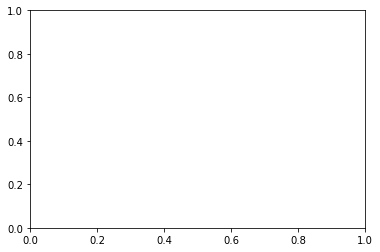

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import interactive

x = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
y = silhouette_0
plt.plot(x,y)
plt.ylabel('Average Price')
plt.xlabel('nilai K')
plt.show()

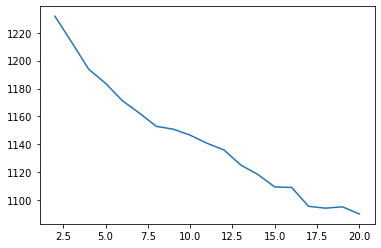

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import interactive

x = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
y = sse_0
plt.plot(x,y)
plt.show()

In [12]:
silhouette_0_df = pd.DataFrame(silhouette_0)
silhouette_0_df.to_excel("shillouette_fix_cs.xlsx")

In [13]:
silhouette_0_df = pd.DataFrame(sse_0)
silhouette_0_df.to_excel("sse_fix_cs.xlsx")

In [33]:
print(centroid)

[[0.00110258 0.00521897 0.00280001 ... 0.         0.         0.        ]
 [0.00364473 0.00101577 0.         ... 0.00078949 0.00171998 0.        ]
 [0.00108325 0.00259382 0.00199195 ... 0.         0.         0.00128366]
 [0.         0.05156305 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [54]:
print(np.average(cluster[:,1]))
print(np.sum(cluster[:,1]))

0.20289347459279541
301.2968097703012


In [56]:
print()

1183.7031902296987


In [62]:
cluster_label = cluster[:,0]

In [63]:
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_avg = silhouette_score(tfidf_df_clean_01, cluster_label)

In [64]:
print(silhouette_avg)

0.007756251196013404
